Importing the Required Libraries and Modules

In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from  sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score


Loading the Data

In [54]:
music_df=pd.read_csv("song_data.csv")
music_df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


Data Retrival

In [55]:
row,columns=music_df.shape
print("No.of Rows = ",row)
print("No.of Columns = ",columns)
music_df.sample(10)

No.of Rows =  130663
No.of Columns =  17


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
81610,DIAL UP,79bHz2cJ5wuEfkEPRMTQw5,Take A Picture,0.003010,0.886,137326,0.714,0.000143,1,0.0809,-3.980,1,0.0396,97.995,4,0.581,16
73419,Blunted Vato,0ha2FqLPhKHzSefoiA9oxB,Chapea,0.218000,0.841,142000,0.377,0.000001,7,0.1330,-13.341,1,0.2120,126.926,4,0.292,7
99447,Sunny Shah,07hNK6YiZYqx6J3bINprzc,Tahuke Akash,0.153000,0.660,274952,0.864,0.000000,4,0.1950,-6.518,1,0.1090,79.969,4,0.675,0
91793,Workout Music,2gD2JfcrOwFeMvmbdwFQ34,Eye of the Tiger (Energy Remix),0.000028,0.583,274307,0.786,0.064700,10,0.3320,-9.036,0,0.0523,165.042,4,0.778,6
70099,tyler coolidge,3zTlU9PixaQwtB387yTSFC,Baewatch,0.386000,0.810,198101,0.685,0.000000,5,0.6390,-6.242,0,0.2530,132.967,4,0.731,13
35206,Deante' Hitchcock,1DFR0JZx6qgPj94NGvSjw5,I See It,0.183000,0.554,219429,0.513,0.000860,1,0.0972,-10.164,1,0.3450,139.622,4,0.158,25
87794,Wild Beasts,1j1tAgLRW9fam3iWGsgnUG,Alpha Female - Live at RAK,0.036400,0.673,226212,0.766,0.829000,0,0.3570,-8.025,1,0.0341,108.054,4,0.717,17
108142,Sting,2WbYvwqG8x5mRuG0zQkmKJ,"Skank Up (Oh Lawd) with Shaggy, feat. Ding Dong",0.330000,0.809,169669,0.578,0.000006,1,0.2810,-7.018,1,0.2190,139.492,4,0.168,3
892,Jaira Burns,7y4beEdjf8LGZ4qXcmQ4Kb,This Time Around,0.313000,0.775,178858,0.471,0.000000,10,0.0558,-6.781,1,0.0417,95.993,4,0.681,41
69068,Black Smurf,6EhMBIXMKzV8iSfnAfwxPO,All Gas No Brakes,0.339000,0.808,111569,0.526,0.000000,0,0.0676,-11.375,0,0.3490,77.514,4,0.264,20


Descriptive Analysis

In [56]:
# Checking of Missing values 
print("Missing values:-\n",music_df.isnull().sum()) 
# It contains only one missing values

Missing values:-
 artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [57]:
'''
track_name consists one Missing value due to the less in number,
removing that missing value from the dataset
'''
print("Missing Value")
music_df[music_df['track_name'].isnull()]

Missing Value


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
54836,VELVETEARS,2vPmLy7QuLoFfEumm6vAbV,NaN,0.418,0.694,148532,0.407,0.000137,5,0.0785,-14.235,0,0.0332,90.023,4,0.151,24


In [58]:
# Droping the Particular Null value from the Dataset
music_df.drop(54836,inplace=True)

In [59]:
print("Missing values:-\n",music_df.isnull().sum()) 

Missing values:-
 artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


As the track_name and artist_name consists of word with space in it so to make it proper spaces and other misshandled values are filled with '_' 

In [60]:
''' 
In pandas, the str accessor is used
to apply string methods to each element in a Series.
'''
music_df[['artist_name', 'track_name']] = music_df[['artist_name', 'track_name']].apply(lambda x: x.str.lower().str.replace(' ', '_'))


Finding the Duplicated Values

In [61]:
music_df.duplicated(subset='track_id').sum()

337

In [62]:
''' Track_id should be uniques and there are 337 duplicated 
track_id which is due to incorrect entries'''
music_df.drop_duplicates(subset='track_id',keep='first',inplace=True)

In [63]:
# Checking of duplicate values
music_df.duplicated(subset='track_id').sum()

0

In [64]:
# Checking for the overall duplicates or row with it's identical present in the dataset
music_df.duplicated().sum()
# No duplicated rows are present

0

Feature Engineering

In [65]:
'''
 We can see that track_name and artist_name are categorical variables
 lets see the uniqueness of the features
'''
print("The uniqueness value for the track_name  ",music_df['track_name'].nunique()/music_df['track_name'].count()*100)
print("The uniqueness value for the artist_name  ",music_df['artist_name'].nunique()/music_df['artist_name'].count()*100)


The uniqueness value for the track_name   81.8860540955304
The uniqueness value for the artist_name   26.468444273930558


In [66]:
''' 
So it's clear that track_name has more unique value but artist name doesn't ,
So we can use the artist_name as Categorical value and we can use One-hot Encoding
'''
encoder=OneHotEncoder(sparse=True)
encoded=encoder.fit_transform(music_df[['artist_name']])
''' 
When sparse=True (default), the output of the fit_transform method will be a 
sparse matrix if most of the values are zero.
When sparse=False is set we can't provide the enough memory and it shows 
an error message of  Unable to allocate 33.5 GiB for an array 
with shape (130325, 34495) and data type float64
'''

c:\Users\Mageshwaran07\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


" \nWhen sparse=True (default), the output of the fit_transform method will be a \nsparse matrix if most of the values are zero.\nWhen sparse=False is set we can't provide the enough memory and it shows \nan error message of  Unable to allocate 33.5 GiB for an array \nwith shape (130325, 34495) and data type float64\n"

In [67]:
# Converting the encoded array into a dataframe 
encoded_df=pd.DataFrame(encoded)
# Concatenating the extinct dataframe and the encoded
music_df=pd.concat([music_df,encoded_df],axis=1)
encoded_df

,0
0,"(0, 33611)\t1.0"
1,"(0, 33611)\t1.0"
2,"(0, 24804)\t1.0"
3,"(0, 5677)\t1.0"
4,"(0, 5677)\t1.0"
...,...
130320,"(0, 4819)\t1.0"
130321,"(0, 26516)\t1.0"
130322,"(0, 20836)\t1.0"
130323,"(0, 6756)\t1.0"


In [68]:
music_df.sample(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,0
108083,yusuf_/_cat_stevens,0FMvskChcKWVnzTb66EV7S,banapple_gas,0.3710,0.598,189627.0,0.880,0.000003,9.0,0.2160,-6.955,1.0,0.0589,99.241,4.0,0.810,24.0,"(0, 24390)\t1.0"
99713,tanishk_bagchi,0kpDAFocaQpfN0UwXAWIJi,sawarne_lage,0.0882,0.784,167000.0,0.679,0.000105,1.0,0.0886,-5.797,1.0,0.0357,100.037,4.0,0.311,27.0,"(0, 25157)\t1.0"
22196,techneekz,2BlODhMzYWCEwOY1zR8vFA,bounce,0.0102,0.812,299040.0,0.931,0.685000,2.0,0.6620,-5.640,1.0,0.0797,125.002,4.0,0.788,1.0,"(0, 32660)\t1.0"
4216,above_&_beyond,3mYrdT5B3vkdZahY1MeU2b,group_therapy_(messages_pt._3)_[abgt279],0.0225,0.811,38707.0,0.683,0.000000,7.0,0.1030,-9.842,1.0,0.3230,124.126,5.0,0.779,3.0,"(0, 501)\t1.0"
96183,johann_sebastian_bach,4Jpi07pI7AHusYQEKKXeel,"cantata_""ich_habe_genug"",_bwv_82:_recitative_""...",0.9710,0.493,70933.0,0.120,0.000068,2.0,0.1090,-16.316,1.0,0.0465,105.411,4.0,0.196,24.0,"(0, 14950)\t1.0"


Feature Selection 

<Axes: >

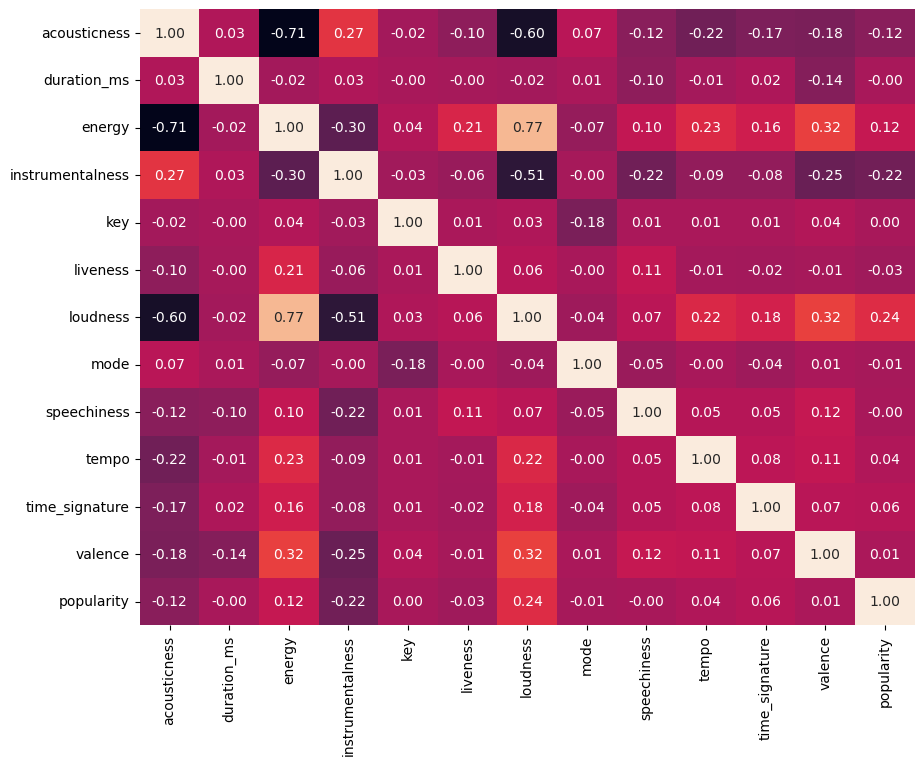

In [69]:
''' 
We Know that artist_name,track_name and track_id  are not going to be inserted
into the Machine Learning Model, So we are droping those features from the column
'''
music_df_1 = music_df[['acousticness', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence','popularity']]
plt.figure(figsize=(10,8))
sns.heatmap(music_df_1.corr(),annot=True,fmt='.2f',cbar=False)

<Axes: >

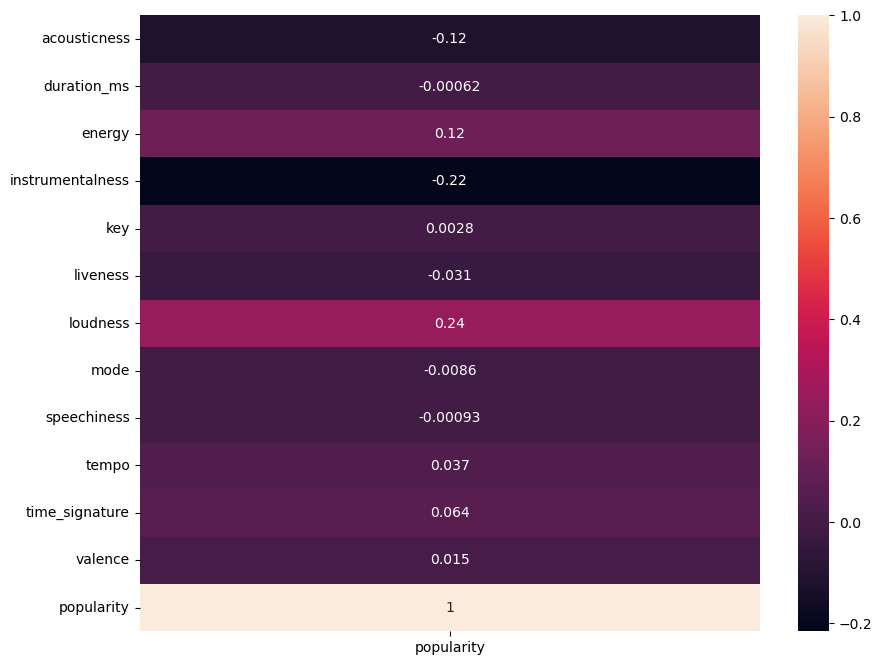

In [70]:
''' 
From the Correlation matrix we can see that acousticness , energy , loudness are corelated,
So based on their corelation with the target variable we can drop any one feature from the dataframe
'''
plt.figure(figsize=(10,8))
sns.heatmap(music_df_1.corr()[['popularity']],annot=True)


In [71]:
''' 
From the above visualization we can see that acousticness and energy
equally corelated to popularity,So we are droping the acousticness from the
dataframe. As the acousticness feature can be easily expalained by the another
feature named energy.
'''
music_df.drop(['acousticness'],axis=1,inplace=True)

In [78]:
music_df.describe()

,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130325.000000,1.303250e+05,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000,130325.000000
mean,0.581331,2.126325e+05,0.569138,0.224385,5.232411,0.194914,-9.979491,0.607911,0.111966,119.468332,3.878765,0.439661,24.130574
std,0.190085,1.232709e+05,0.260397,0.360518,3.602864,0.167782,6.547401,0.488218,0.124341,30.162450,0.514786,0.259156,19.662534
min,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.459000,1.638800e+05,0.396000,0.000000,2.000000,0.097500,-11.905000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.605000,2.019050e+05,0.603000,0.000151,5.000000,0.124000,-7.983000,1.000000,0.055800,120.026000,4.000000,0.420000,21.000000
75%,0.727000,2.410590e+05,0.775000,0.444000,8.000000,0.236000,-5.686000,1.000000,0.129000,139.613000,4.000000,0.638000,38.000000
max,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


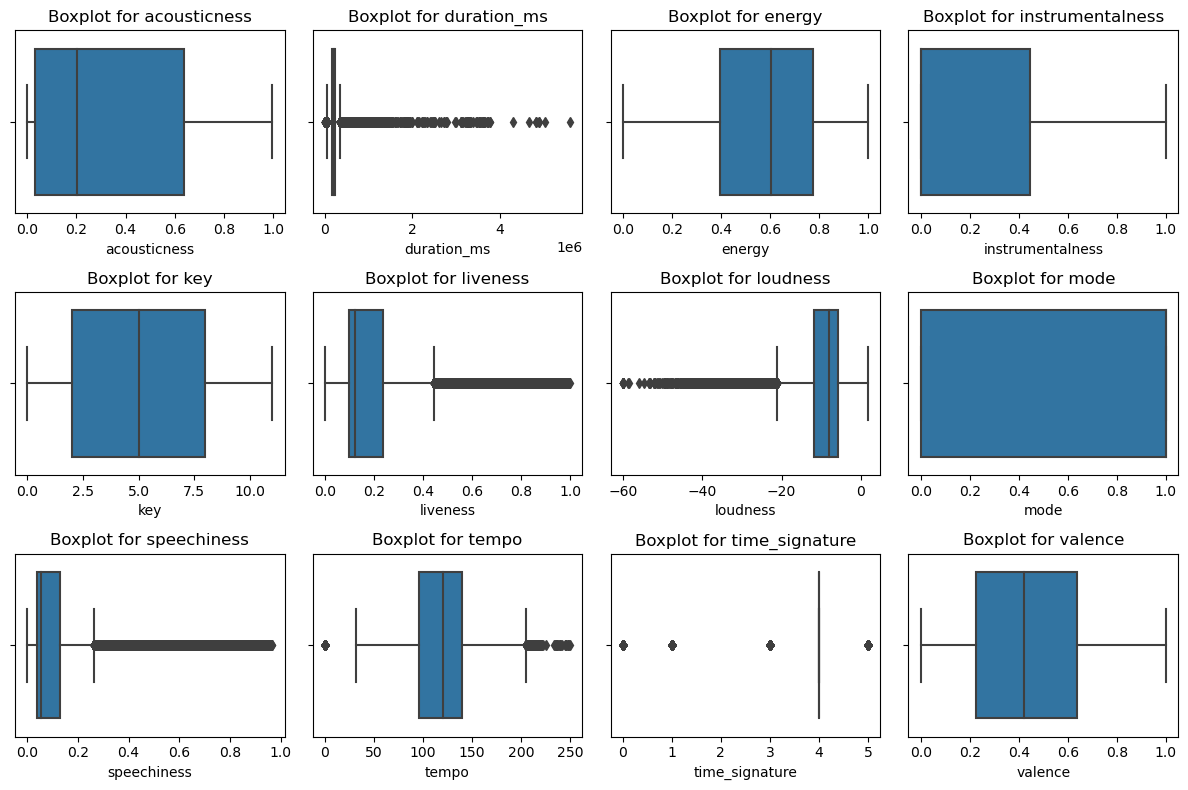

In [77]:
plt.figure(figsize=(12, 8))

# Iterate through each column and create boxplots
for i, column in enumerate(music_df_1.columns[:-1]):
    plt.subplot(3, 4, i+1)  # Adjust the subplot layout if needed
    sns.boxplot(x=music_df_1[column])
    plt.title(f'Boxplot for {column}')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()